In [40]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [41]:
data = pd.read_csv('./data.csv', encoding='utf-8')
data

,site,longitude,dimension
0,1,1150,1760
1,2,630,1660
2,3,40,2090
3,4,750,1100
4,5,750,2030
5,6,1030,2070
6,7,1650,650
7,8,1490,1630
8,9,790,2260
9,10,710,1310


In [42]:
data = data.iloc[:, 1:]
data = np.array(data)
data

array([[1150, 1760],
       [ 630, 1660],
       [  40, 2090],
       [ 750, 1100],
       [ 750, 2030],
       [1030, 2070],
       [1650,  650],
       [1490, 1630],
       [ 790, 2260],
       [ 710, 1310],
       [ 840,  550],
       [1170, 2300],
       [ 970, 1340],
       [ 510,  700],
       [ 750,  900],
       [1280, 1200],
       [ 230,  590],
       [ 460,  860],
       [1040,  950],
       [ 590, 1390],
       [ 830, 1770],
       [ 490,  500],
       [1840, 1240],
       [1260, 1500],
       [1280,  790],
       [ 490, 2130],
       [1460, 1420],
       [1260, 1910],
       [ 360, 1980]], dtype=int64)

In [43]:
class RA(object):
    def __init__(self, num_city, data, item=100000):
        self.num_city = num_city
        self.location = data
        self.dis_mat = self.compute_dis_mat(num_city, data)
        self.item = item
        
    # 计算不同城市之间的距离
    def compute_dis_mat(self, num_city, location):
        dis_mat = np.zeros((num_city, num_city))
        for i in range(num_city):
            for j in range(num_city):
                if i == j:
                    dis_mat[i][j] = np.inf
                    continue
                a = location[i]
                b = location[j]
                tmp = np.sqrt(sum([(x[0] - x[1]) ** 2 for x in zip(a, b)]))
                dis_mat[i][j] = tmp
        return dis_mat
    
    # 计算路径长度
    def compute_pathlen(self, path, dis_mat):
        a = path[0]
        b = path[-1]
        result = dis_mat[a][b]
        for i in range(len(path) - 1):
            a = path[i]
            b = path[i + 1]
            result += dis_mat[a][b]
        return result
    
    # 随机
    def run(self):
        tmppath = [x for x in range(self.num_city)]
        tmplen = 0
        tmplen = self.compute_pathlen(tmppath, self.dis_mat)
        
        for cnt in range(self.item):
            # print(f'第{cnt+1}次')
            # print(f'tmppayh:{tmppath}')
            random.shuffle(tmppath)
            # print(f'new_path:{tmppath}')
            new_len = self.compute_pathlen(tmppath, self.dis_mat)
            new_len += self.dis_mat[tmppath[0]][tmppath[-1]]
            # print(f'新距离为:{new_len}')
            if new_len < tmplen:
                respath = tmppath
                tmplen = new_len
                # print(f'最小距离为:{tmplen}')
        return self.location[respath], tmplen


In [44]:
model = RA(num_city=data.shape[0], data=data.copy())
Best_path, Best = model.run()
print('规划的路径长度:{}'.format(Best))
print(Best_path)

规划的路径长度:16312.227352169513
[[1030 2070]
 [1260 1910]
 [ 460  860]
 [1040  950]
 [1280  790]
 [1280 1200]
 [ 750 2030]
 [ 840  550]
 [ 360 1980]
 [1150 1760]
 [1460 1420]
 [ 970 1340]
 [1260 1500]
 [ 710 1310]
 [ 790 2260]
 [  40 2090]
 [ 590 1390]
 [ 510  700]
 [ 750  900]
 [1840 1240]
 [1170 2300]
 [ 490 2130]
 [1490 1630]
 [ 750 1100]
 [ 830 1770]
 [ 630 1660]
 [ 490  500]
 [ 230  590]
 [1650  650]]


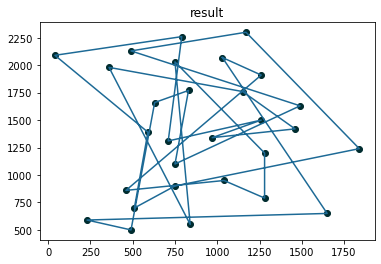

In [46]:
plt.scatter(Best_path[:, 0], Best_path[:, 1], color='#002C2F')
Best_path = np.vstack([Best_path, Best_path[0]])
plt.plot(Best_path[:, 0], Best_path[:, 1], '#1D6A96')
plt.title('result')
plt.savefig('./RA.png', dpi=600)
plt.show()

In [37]:
r = pd.DataFrame(columns=['longitude', 'dimension'], data=Best_path)
b = pd.Series({'Best': Best})
a = pd.concat([r, b], axis=1)
a.to_csv('RA.csv', encoding='utf-8', index=False)